# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | laguna
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | kingston
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | fereydun kenar
Processing Record 11 of Set 1 | houghton
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | prince rupert
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | hawaiian paradise park
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | zaozersk
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | chibougamau
Processing Record 21 of Set 1 | eilat
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | port-gentil
Processing Record 38 of Set 4 | graaff-reinet
Processing Record 39 of Set 4 | nelson bay
Processing Record 40 of Set 4 | luang prabang
Processing Record 41 of Set 4 | ola
Processing Record 42 of Set 4 | talnakh
Processing Record 43 of Set 4 | uturoa
Processing Record 44 of Set 4 | hobyo
Processing Record 45 of Set 4 | vastaboland
City not found. Skipping...
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | bandrele
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | chifeng
Processing Record 0 of Set 5 | banfora
Processing Record 1 of Set 5 | badulla
Processing Record 2 of Set 5 | vorkuta
Processing Record 3 of Set 5 | antalaha
Processing Record 4 of Set 5 | punta arenas
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | tibu
Processing Record 7 of Set 5 | mananjary
Processing Record 8 of Set 5 | lent'ekhi
Processing Record 9 of Set 5 | bayramaly
Processing Record 10 of Set 5 | enew

Processing Record 27 of Set 8 | luanda
Processing Record 28 of Set 8 | trairi
Processing Record 29 of Set 8 | hyesan
Processing Record 30 of Set 8 | pangody
Processing Record 31 of Set 8 | kangasala
Processing Record 32 of Set 8 | huarmey
Processing Record 33 of Set 8 | akrehamn
Processing Record 34 of Set 8 | port isabel
Processing Record 35 of Set 8 | santa cruz
Processing Record 36 of Set 8 | emmett
Processing Record 37 of Set 8 | anibare
City not found. Skipping...
Processing Record 38 of Set 8 | tanah rata
Processing Record 39 of Set 8 | borogontsy
Processing Record 40 of Set 8 | koryazhma
Processing Record 41 of Set 8 | corfu
Processing Record 42 of Set 8 | mazagao
Processing Record 43 of Set 8 | ust'-uda
Processing Record 44 of Set 8 | lunas
Processing Record 45 of Set 8 | madaoua
Processing Record 46 of Set 8 | sao felix do xingu
Processing Record 47 of Set 8 | balakovo
Processing Record 48 of Set 8 | yaren
Processing Record 49 of Set 8 | hohhot
Processing Record 0 of Set 9 | m

Processing Record 21 of Set 12 | siparia
Processing Record 22 of Set 12 | ephraim
Processing Record 23 of Set 12 | nuuk
Processing Record 24 of Set 12 | kulhudhuffushi
Processing Record 25 of Set 12 | pietermaritzburg
Processing Record 26 of Set 12 | constitucion
Processing Record 27 of Set 12 | viransehir
Processing Record 28 of Set 12 | arenapolis
Processing Record 29 of Set 12 | isangel
Processing Record 30 of Set 12 | lubang
Processing Record 31 of Set 12 | opuwo
Processing Record 32 of Set 12 | nar'yan-mar
Processing Record 33 of Set 12 | morondava
Processing Record 34 of Set 12 | amqui
Processing Record 35 of Set 12 | alice springs
Processing Record 36 of Set 12 | linshui
Processing Record 37 of Set 12 | onega
Processing Record 38 of Set 12 | paracuru
Processing Record 39 of Set 12 | pul-e 'alam
Processing Record 40 of Set 12 | mitsamiouli
Processing Record 41 of Set 12 | 'ohonua
City not found. Skipping...
Processing Record 42 of Set 12 | talakan
Processing Record 43 of Set 12 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talcahuano,-36.7167,-73.1167,10.82,93,75,1.54,CL,1690325232
1,poyarkovo,49.6000,128.6833,22.03,83,90,2.95,RU,1690325394
2,waitangi,-43.9535,-176.5597,9.34,98,100,0.89,NZ,1690325395
3,la tuque,47.4334,-72.7824,24.14,46,86,2.57,CA,1690325395
4,port-aux-francais,-49.3500,70.2167,3.66,81,97,9.09,TF,1690325395


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talcahuano,-36.7167,-73.1167,10.82,93,75,1.54,CL,1690325232
1,poyarkovo,49.6000,128.6833,22.03,83,90,2.95,RU,1690325394
2,waitangi,-43.9535,-176.5597,9.34,98,100,0.89,NZ,1690325395
3,la tuque,47.4334,-72.7824,24.14,46,86,2.57,CA,1690325395
4,port-aux-francais,-49.3500,70.2167,3.66,81,97,9.09,TF,1690325395


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

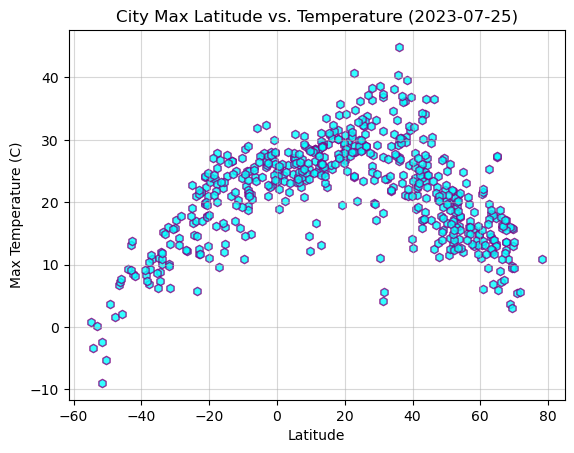

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="purple",
    facecolors="cyan",
    linewidths=1,
    marker="h", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

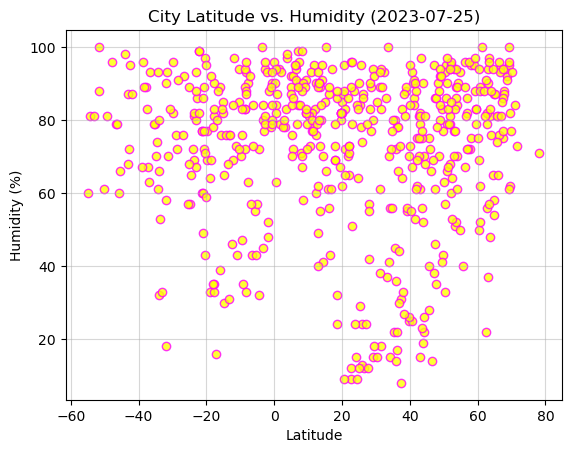

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="magenta",
    facecolors="yellow",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True, alpha=0.5)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

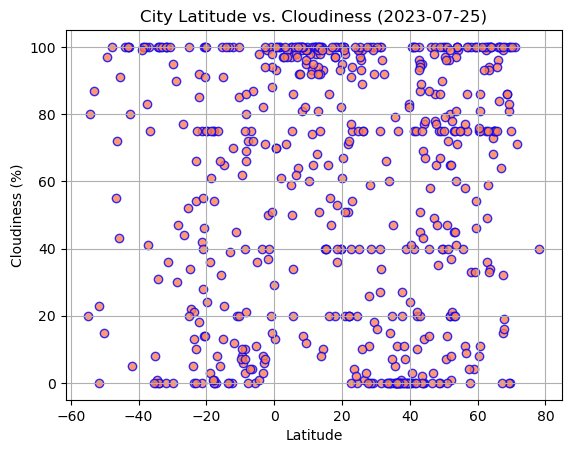

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="blue",
    facecolors="coral",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

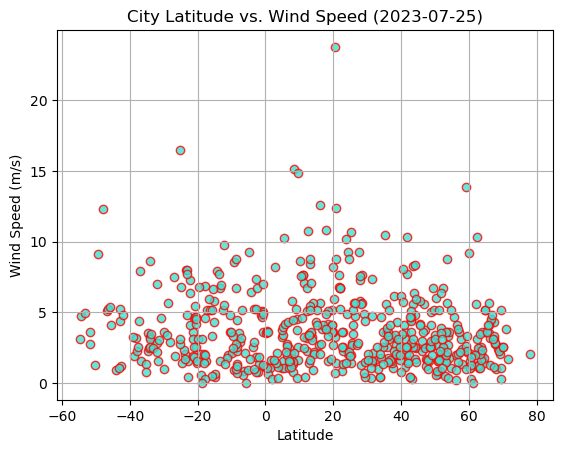

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="red",
    facecolors="turquoise",
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title,
                           text_coordinates, edgecolor, color):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values, edgecolors = edgecolor, c= color)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,laguna,38.4210,-121.4238,36.84,32,0,6.69,US,1690502813
3,college,64.8569,-147.8028,27.26,49,75,3.60,US,1690502814
6,kingston,17.9970,-76.7936,30.53,70,20,8.23,JM,1690502669
7,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,100,100,2.00,RU,1690502816
8,udachny,66.4167,112.4000,16.92,51,100,1.90,RU,1690502816


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.51,83,100,4.59,GS,1690502813
2,bredasdorp,-34.5322,20.0403,9.07,91,0,1.60,ZA,1690502814
4,waitangi,-43.9535,-176.5597,9.34,86,63,4.47,NZ,1690502814
5,puerto natales,-51.7236,-72.4875,-3.08,89,69,1.42,CL,1690502815
15,papatowai,-46.5619,169.4708,8.47,72,85,3.13,NZ,1690502819


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3893387390792261


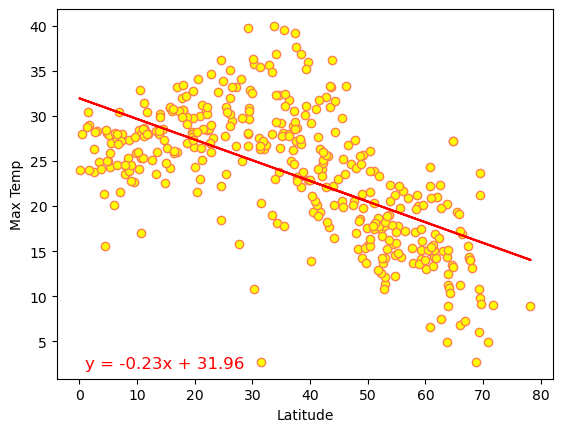

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (1, 2), 'coral', 'yellow')

The r-value is: 0.6918699831651306


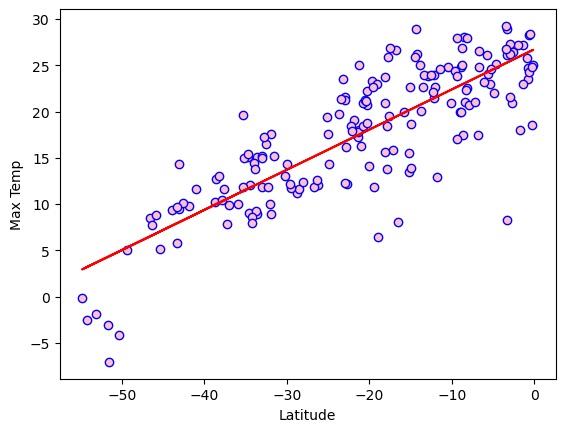

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35),
                      'blue', 'pink')

**Discussion about the linear relationship:** The relation between the the Latitude and the Max Temperature is strongly positive in this graph.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00020391435780966056


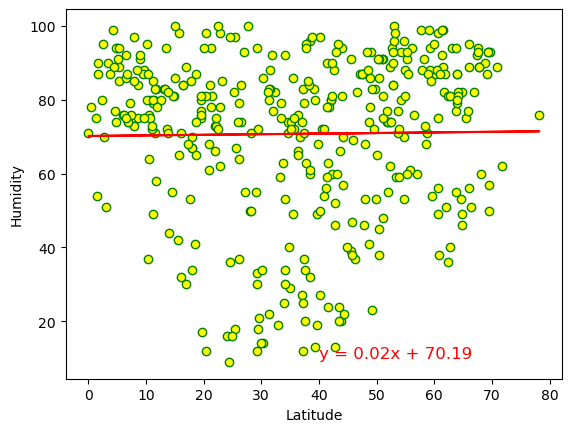

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10), 'green', 'yellow')

The r-value is: 0.00979285910531995


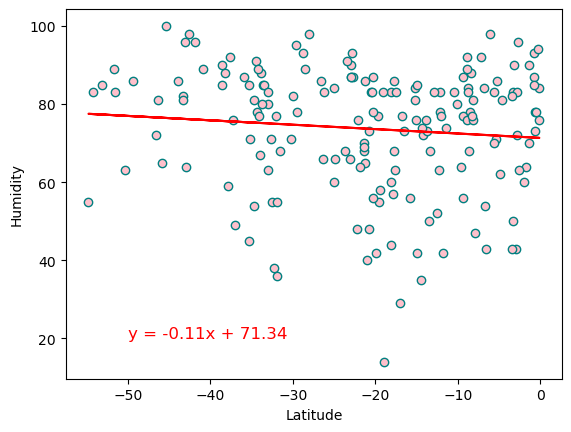

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20),'teal', 'pink')

**Discussion about the linear relationship:** The relationship between Humidity and Latitude is none or extrmely weak.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.004669311676607802


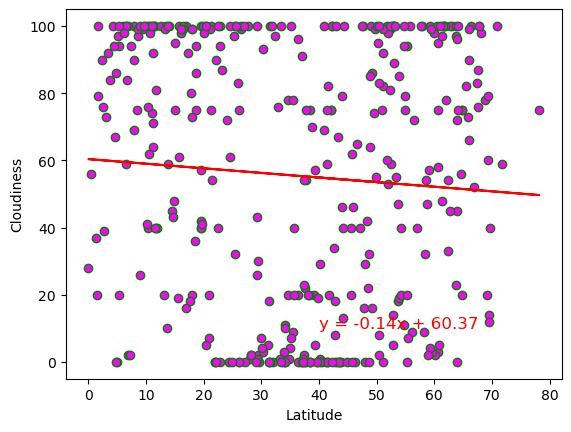

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10), 'green', 'magenta')

The r-value is: 0.03251391565457627


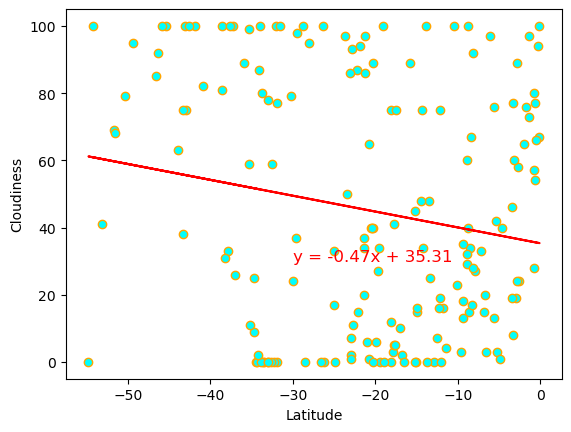

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30), 'orange', 'cyan')

#### **Discussion about the linear relationship:** The relationship between Cloudiness and Latitude is week in this graph.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.054896743742247574


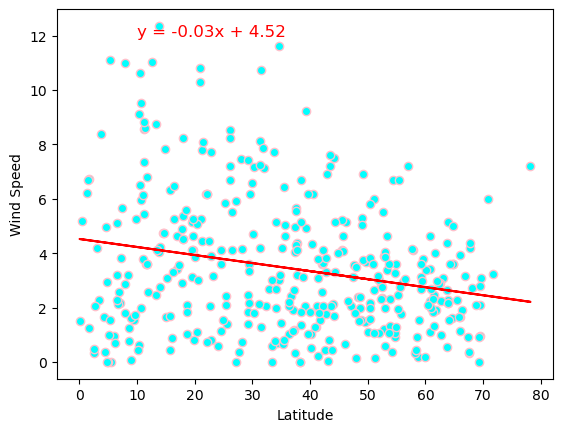

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12), 'pink', 'cyan')

The r-value is: 0.0032882013238888083


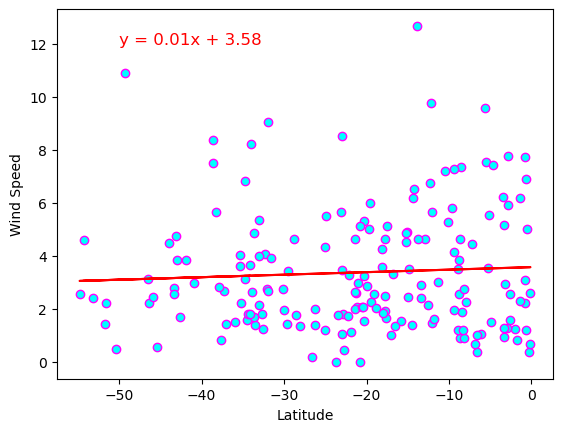

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12), 'magenta', 'cyan')

**Discussion about the linear relationship:** The relationship in this graph is low and fails to succesfully model the points.